<a href="https://colab.research.google.com/github/azdafatimazahra6920encg-source/DS-2025-/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

========= Loading Dataset =========

========= Dataset summary =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB

========= A few first samples =========

   fixed_a

/tmp/ipython-input-4147494988.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


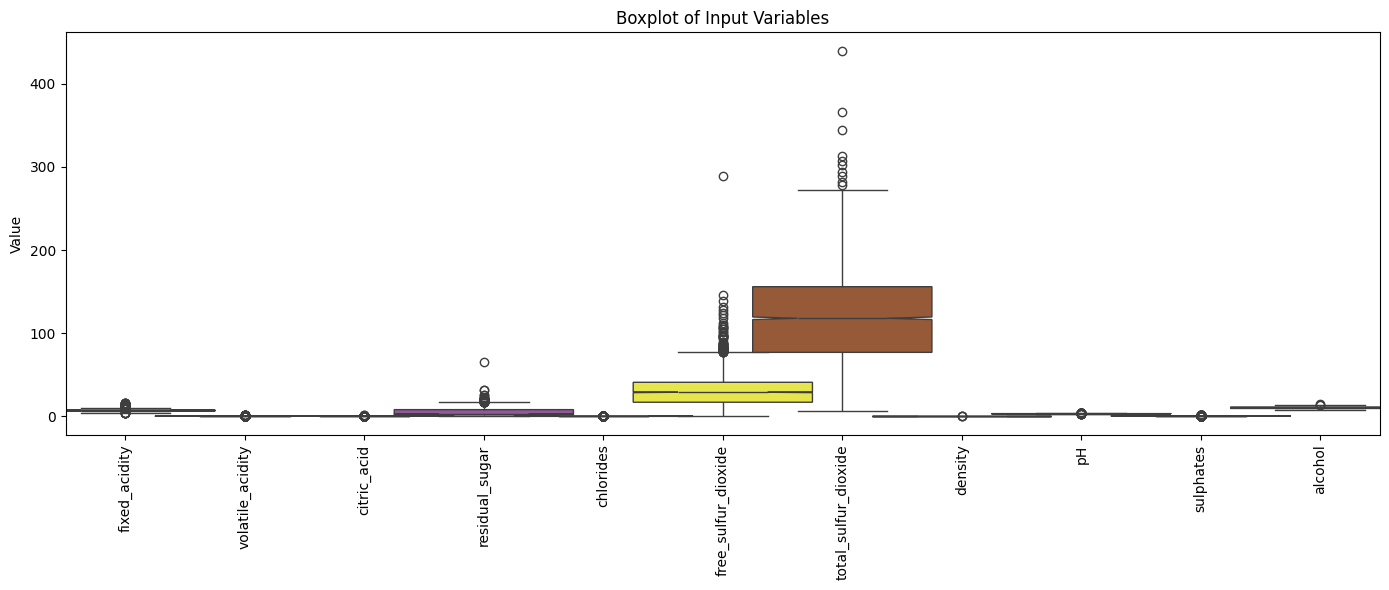

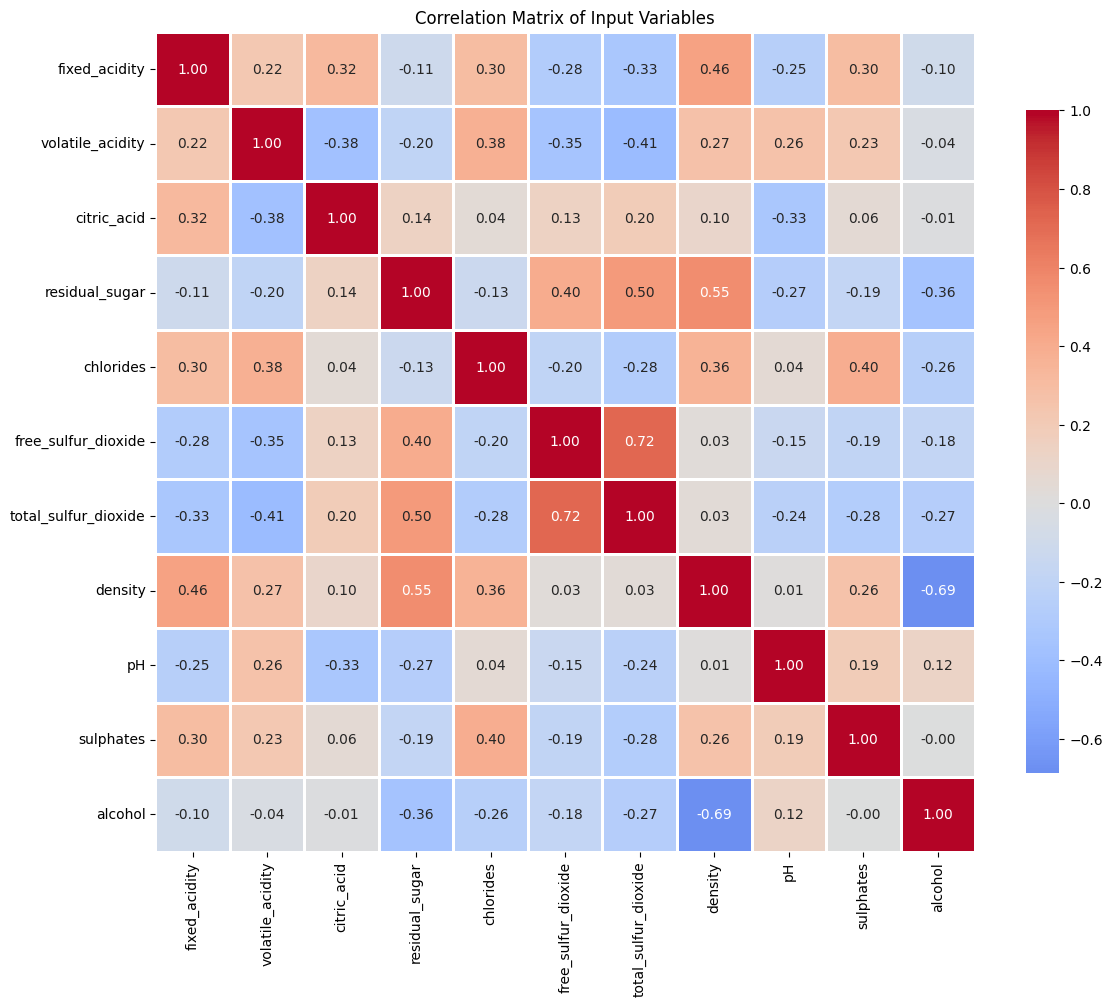


========= Comments on Statistical Analysis =========

1. SCALE DIFFERENCES:
   - total_sulfur_dioxide has the highest mean (115.74)
   - Density is close to 1 (0.9947)
   - This suggests normalization will be important for k-NN

2. VARIABILITY:
   - residual_sugar shows high variance (22.64)
   - free_sulfur_dioxide also varies significantly (315.04)
   - These features have wide distributions (see boxplot)

3. CORRELATIONS (|r| > 0.5):
   - residual_sugar <-> density: 0.553
   - free_sulfur_dioxide <-> total_sulfur_dioxide: 0.721
   - density <-> alcohol: -0.687

4. OUTLIERS:
   - Several features show outliers (see boxplot notches)
   - These may affect k-NN performance (distance-based method)


In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= 1. Load the data =========
print("========= Loading Dataset =========\n")

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Combiner X et y pour créer un DataFrame complet
df = pd.concat([X, y], axis=1)

print("========= Dataset summary =========\n")
df.info()

print("\n========= A few first samples =========\n")
print(df.head())

# metadata
print("\n========= Metadata =========\n")
print(wine_quality.metadata)

# variable information
print("\n========= Variable information =========\n")
print(wine_quality.variables)

print(f"\nNumber of samples: {df.shape[0]}")
print(f"Number of input features: {df.shape[1] - 1}")  # -1 car on exclut 'quality'

# ========= 2. Form arrays X and Y =========
X = df.drop("quality", axis=1)  # we drop the column "quality"
Y = df["quality"]

print("\n========= Wine Qualities =========\n")
print(Y.value_counts().sort_index())

# ========= 3. Binary classification =========
# bad wine (y=0) : quality <= 5 and good quality (y=1) otherwise
Y = [0 if val <= 5 else 1 for val in Y]

print("\n========= Binary Classification =========\n")
print("Class distribution:")
print(pd.Series(Y).value_counts().sort_index())
print(f"\nClass 0 (bad wine, quality <= 5): {pd.Series(Y).value_counts()[0]} samples")
print(f"Class 1 (good wine, quality > 5): {pd.Series(Y).value_counts()[1]} samples")

# ========= 4. Statistical analysis =========
print("\n========= Statistical Analysis =========\n")

# Mean and variance
print("Mean values:")
print(X.mean())
print("\nVariance:")
print(X.var())
print("\nStandard deviation:")
print(X.std())

# Full statistical summary
print("\n========= Complete Statistical Summary =========\n")
print(X.describe())

# Boxplot
plt.figure(figsize=(14, 6))
ax = plt.gca()
sns.boxplot(data=X, orient="v", palette="Set1", width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Boxplot of Input Variables")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Input Variables")
plt.tight_layout()
plt.show()

# Comments on results
print("\n========= Comments on Statistical Analysis =========\n")
print("1. SCALE DIFFERENCES:")
print(f"   - total_sulfur_dioxide has the highest mean ({X['total_sulfur_dioxide'].mean():.2f})")
print(f"   - Density is close to 1 ({X['density'].mean():.4f})")
print(f"   - This suggests normalization will be important for k-NN\n")

print("2. VARIABILITY:")
print(f"   - residual_sugar shows high variance ({X['residual_sugar'].var():.2f})")
print(f"   - free_sulfur_dioxide also varies significantly ({X['free_sulfur_dioxide'].var():.2f})")
print(f"   - These features have wide distributions (see boxplot)\n")

print("3. CORRELATIONS (|r| > 0.5):")
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.5:
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

for feat1, feat2, corr_val in high_corr:
    print(f"   - {feat1} <-> {feat2}: {corr_val:.3f}")

print("\n4. OUTLIERS:")
print("   - Several features show outliers (see boxplot notches)")
print("   - These may affect k-NN performance (distance-based method)")